# **Ejemplo lineal de clase**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

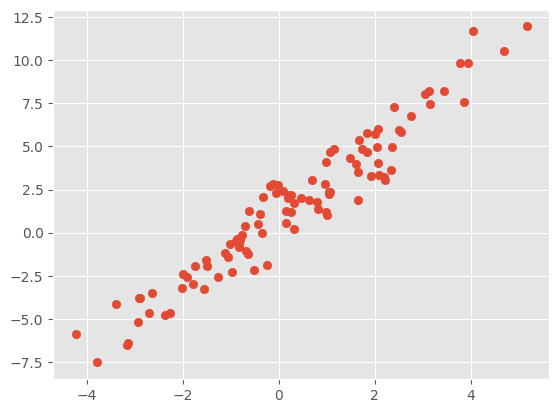

In [ ]:
m = 100

f = lambda X : 2 * X +1

x = np.random.normal(loc=0, scale = 2, size=m)

x_test = np.random.normal(loc=0, scale = 2, size=30)

e = np.random.normal(loc=0, scale = 1, size=m)
#funcion real
y= f(x) + e

plt.scatter(x,y)

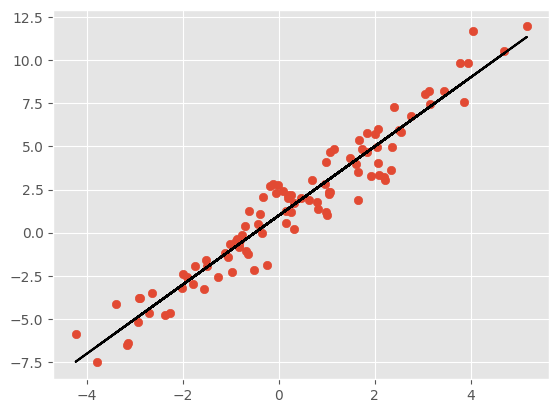

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1,1),y)

y_hat = model.predict(x.reshape(-1,1))

plt.scatter(x,y)
plt.plot(x,y_hat, color= "k")

In [ ]:
sklearn.metrics.mean_squared_error(y,y_hat)
#

1.2311061346453696

In [ ]:
y_test = model.predict(x_test.reshape(-1,1))

mse_test = np.mean((y_test - f(x_test))**2)

mse_train = np.mean((y_hat - f(x))**2)

print(mse_test, mse_train)
#

2.305504439340304e-05 3.0405131105982093e-05


# **Ejercicio**

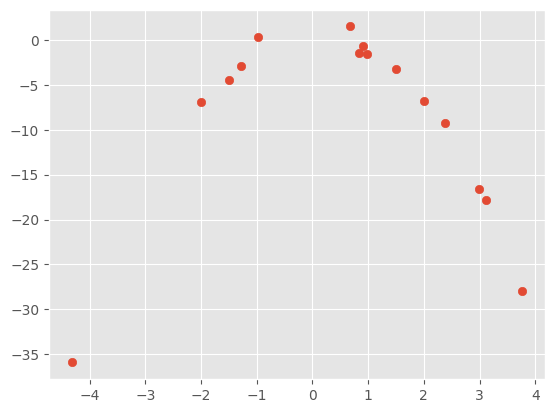

In [ ]:
#Numero de muestras
m = 15

#Funcion cuadratica "ideal"
f = lambda X : 2 * -X**2 +1

#Datos
x = np.random.normal(loc=0, scale = 2, size=m)

#Datos con los que se prueban
x_test = np.random.normal(loc=0, scale = 2, size=30)

#error
e = np.random.normal(loc=0, scale = 1, size=m)

#funcion real
y = f(x) + e

plt.scatter(x,y)

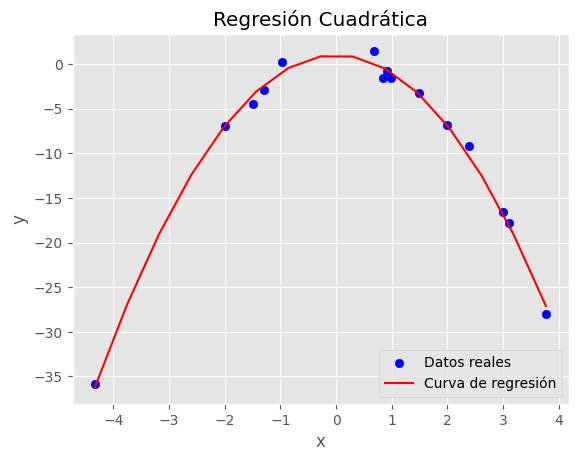

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Creacion de Polynomial
poly = PolynomialFeatures(degree=2)
#Se crea una matriz de una sola columna con los valores de x y luego el transform
#  le crea todos los valores de polinomio correspondiente, 2 en este caso
x_poly = poly.fit_transform(x.reshape(-1, 1))

# Ajuste del modelo de regresión lineal
model = LinearRegression()
model.fit(x_poly, y)

# Predicciones con el modelo ajustado
#Esta linea se encarga de crear 100 puntos igualmente distanciados entre los valores
#  que contiene la variable de x
x_range = np.linspace(min(x), max(x), 15)
#Se vuelve a utilizar la transformacion polinomica para trabajar con los mismos
#  valores
x_range_poly = poly.transform(x_range.reshape(-1, 1))
#Se realiza la prediccion que seria en este mismo caso y_hat para el anterior ejemplo
y_range_pred = model.predict(x_range_poly)

# Visualización de los resultados y la curva de regresión
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_range, y_range_pred, color='red', label='Curva de regresión')
plt.title("Regresión Cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
sklearn.metrics.mean_squared_error(y,y_range_pred)

159.66641345827955

In [ ]:
errores = []

#Se adaptan los valores de x test a forma polinomica
x_test_poly = poly.transform(x_test.reshape(-1, 1))

#Se crea la predicion con los datos de prueba
y_test = model.predict(x_test_poly)

#Se calculan los diferentes errores
mse_test = np.mean((y_test - f(x_test))**2)
mse_train = np.mean((y_range_pred - f(x))**2)
errores.append([mse_test, mse_train])

print(mse_test, mse_train)

0.0320816734661818 158.4787756004398


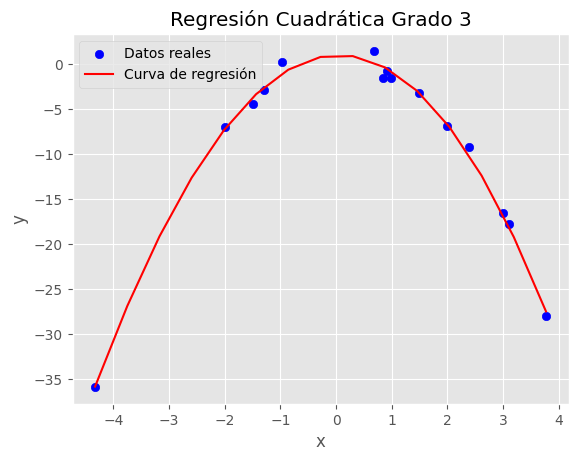

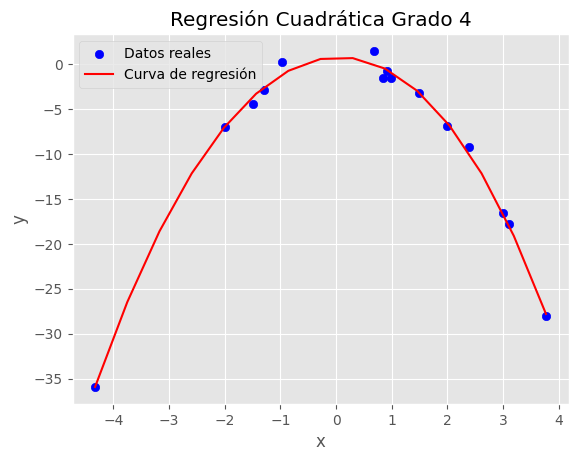

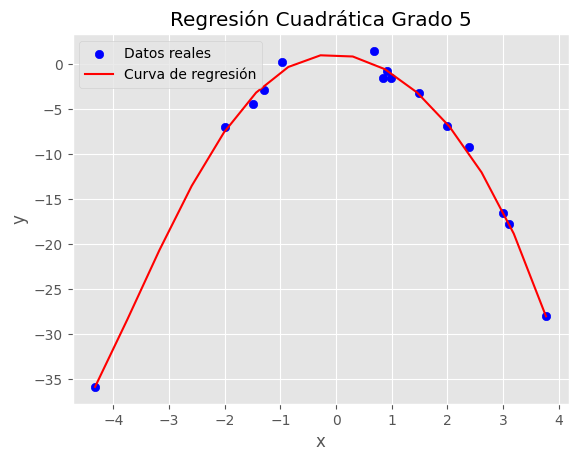

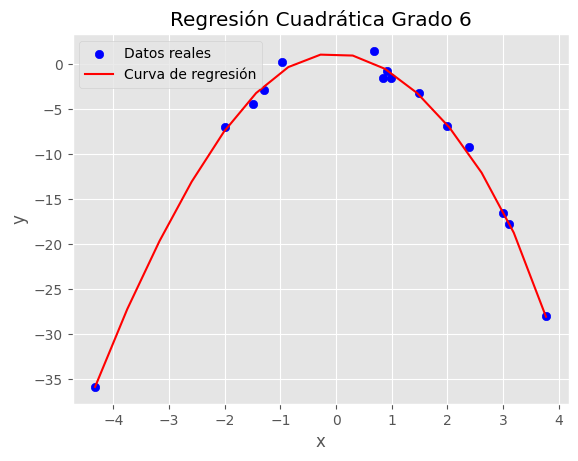

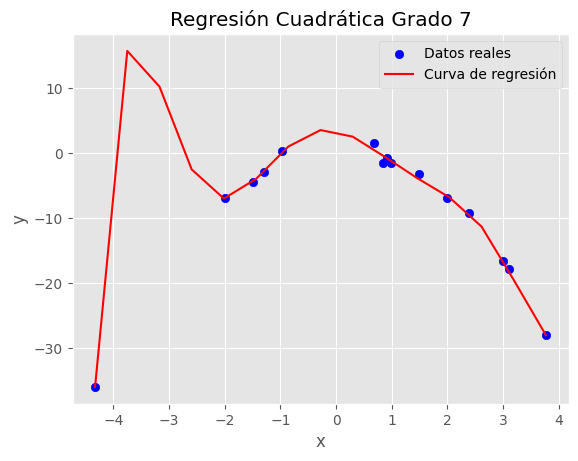

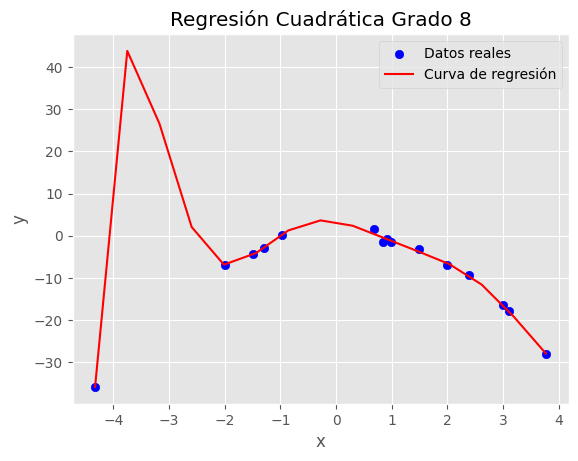

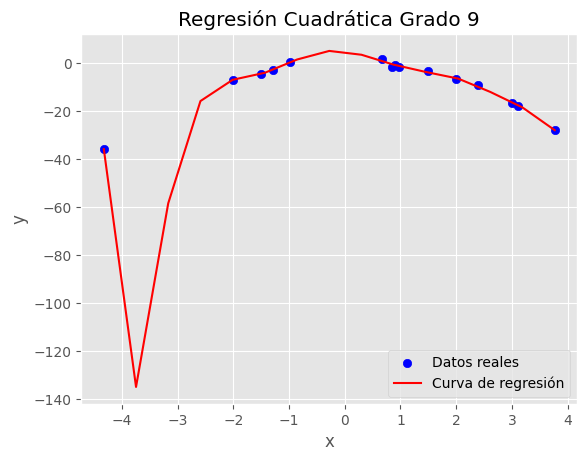

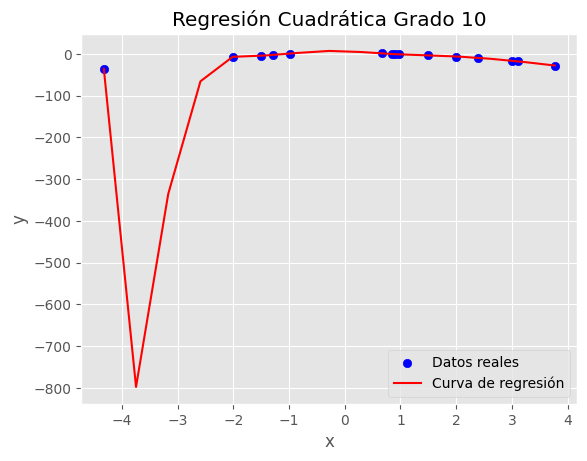

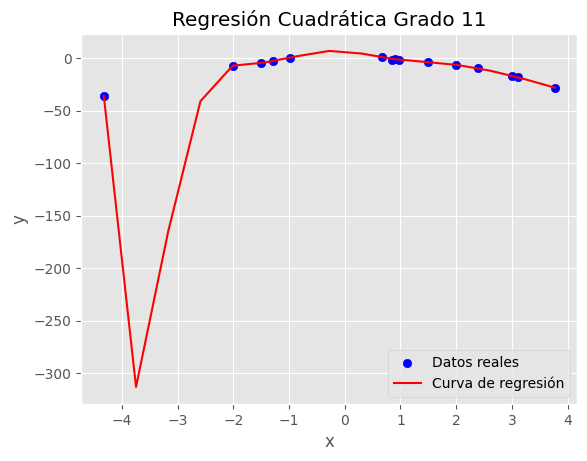

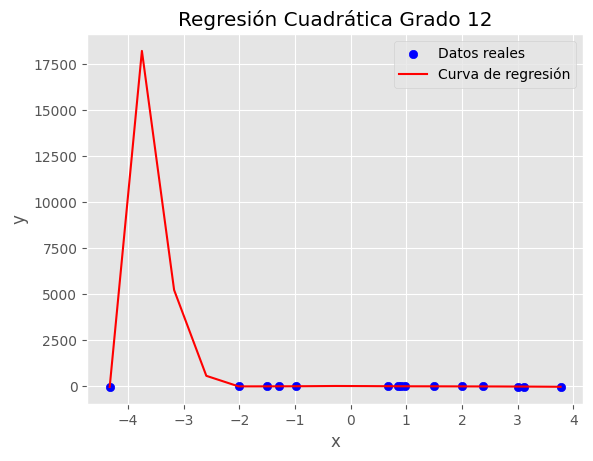

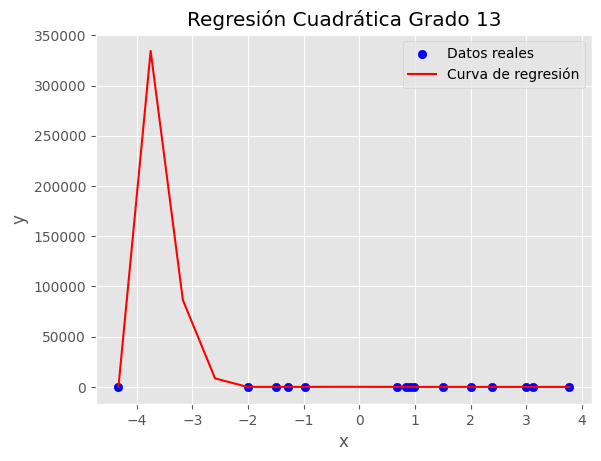

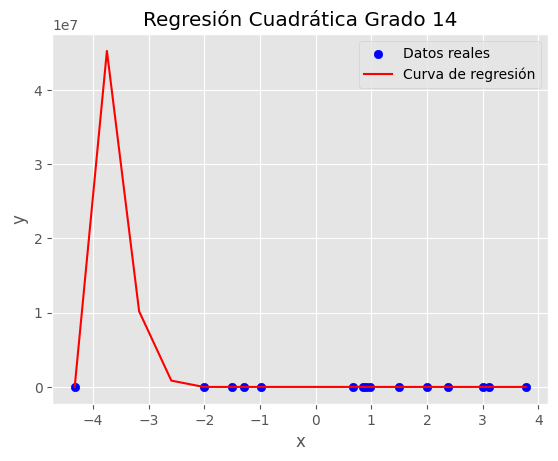

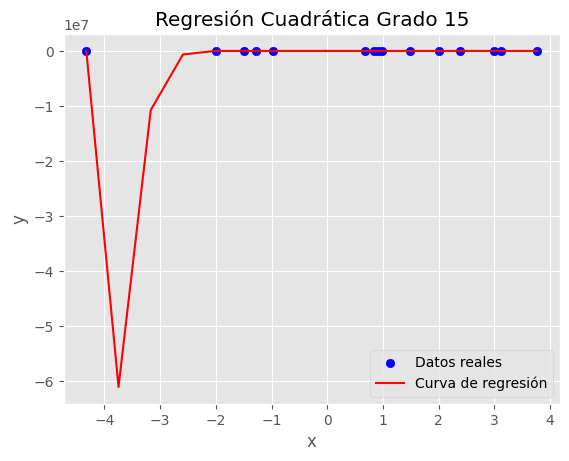

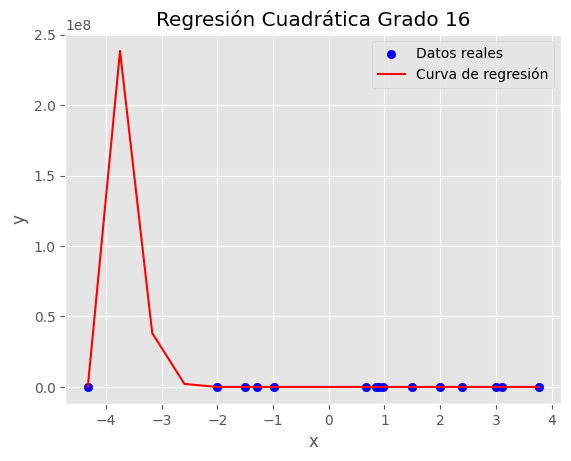

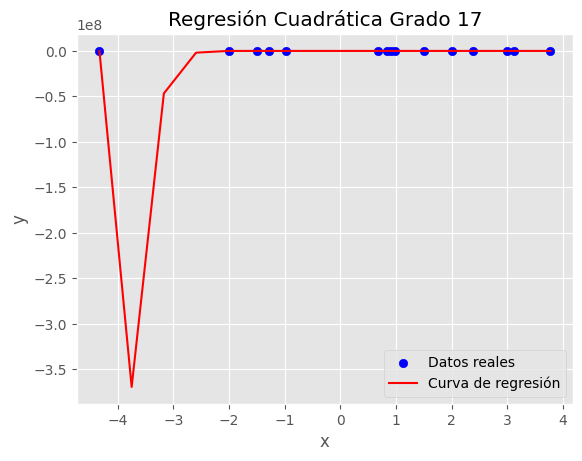

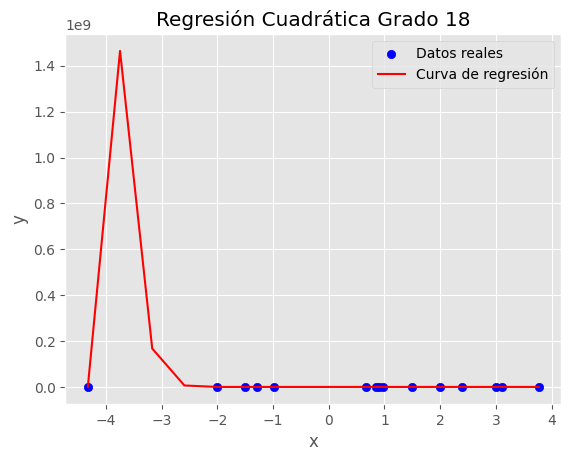

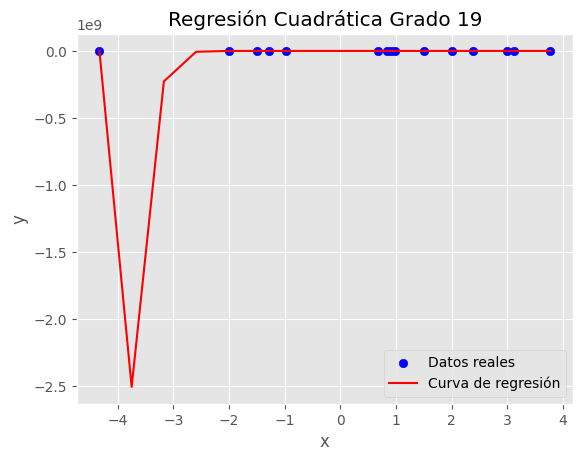

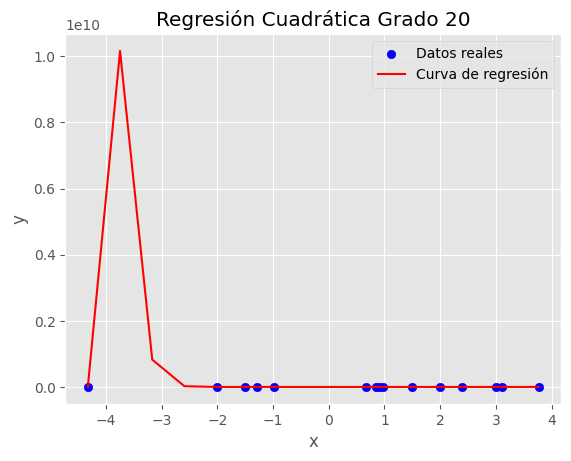

In [ ]:
for i in range(3,21):
  model = LinearRegression()
  poly = PolynomialFeatures(degree=i)
  x_poly = poly.fit_transform(x.reshape(-1, 1))

  model.fit(x_poly, y)

  x_range = np.linspace(min(x), max(x), 15)

  x_range_poly = poly.transform(x_range.reshape(-1, 1))

  y_range_pred = model.predict(x_range_poly)

  plt.scatter(x, y, color='blue', label='Datos reales')
  plt.plot(x_range, y_range_pred, color='red', label='Curva de regresión')
  plt.title('Regresión Cuadrática Grado {i}'.format(i=i))
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

  x_test_poly = poly.transform(x_test.reshape(-1, 1))

  y_test = model.predict(x_test_poly)

  mse_test = np.mean((y_test - f(x_test))**2)
  mse_train = np.mean((y_range_pred - f(x))**2)
  errores.append([mse_test, mse_train])

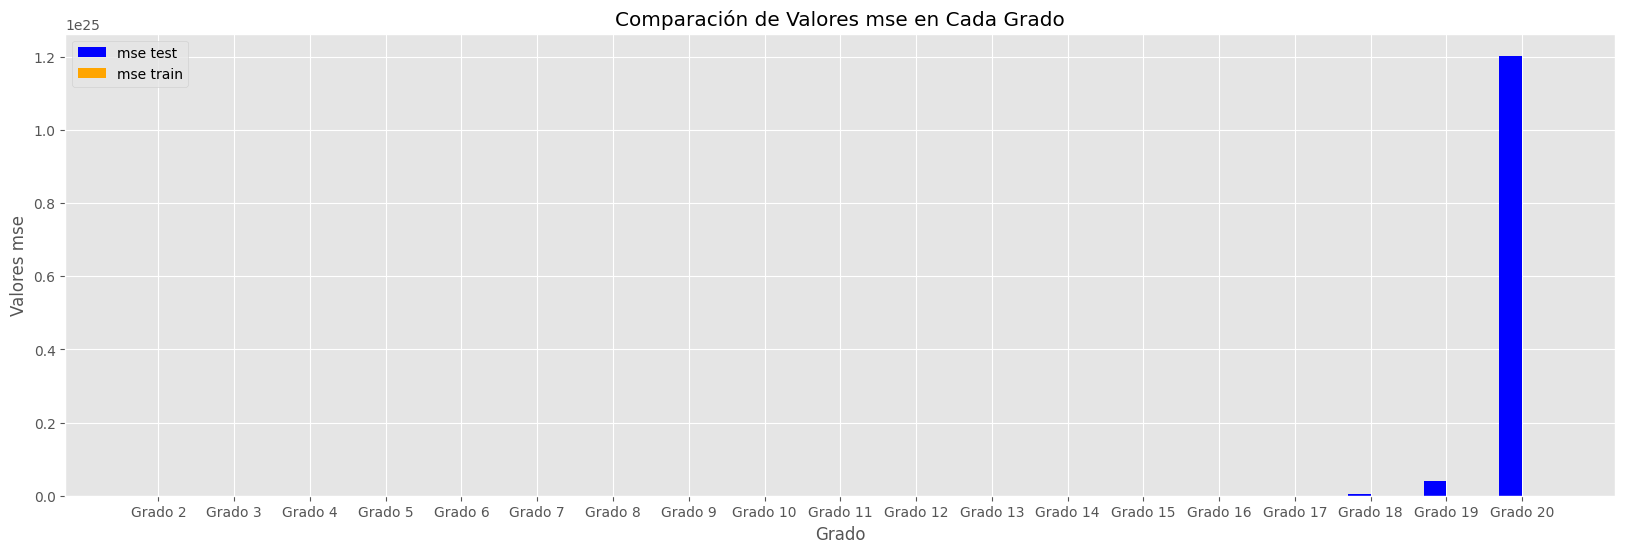

In [ ]:
msetest = [x[0] for x in errores]
msetrain = [x[1] for x in errores]

totalgrados = np.arange(len(errores))
plt.figure(figsize=(20, 6))
ancho = 0.3

plt.bar(totalgrados, msetest, width=ancho, label='mse test', color='blue')
plt.bar(totalgrados + ancho, msetrain, width=ancho, label='mse train', color='orange')

plt.xlabel('Grado')
plt.ylabel('Valores mse')
plt.title('Comparación de Valores mse en Cada Grado')
plt.xticks(totalgrados + ancho / 2, [f'Grado {i+2}' for i in range(len(errores))])
plt.legend()
plt.show()

#**Segundo Test del ejercicio**

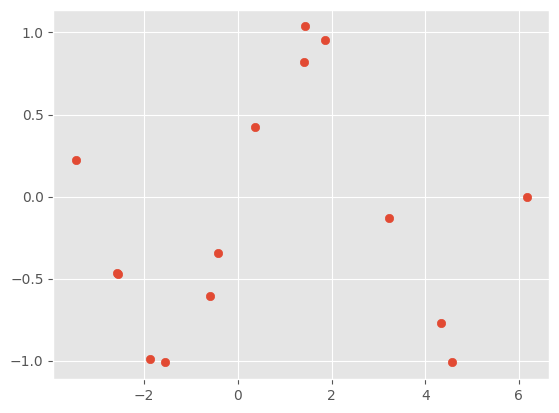

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')

m = 15
f= lambda x: np.sin(x)

x = np.sort(np.random.normal(loc=0, scale = 3, size=m))

x_test = np.sort(np.random.normal(loc=0, scale = 3, size=5))

e = np.random.normal(loc=0, scale = 0.1, size=m)
y = f(x) + e
plt.scatter(x,y)

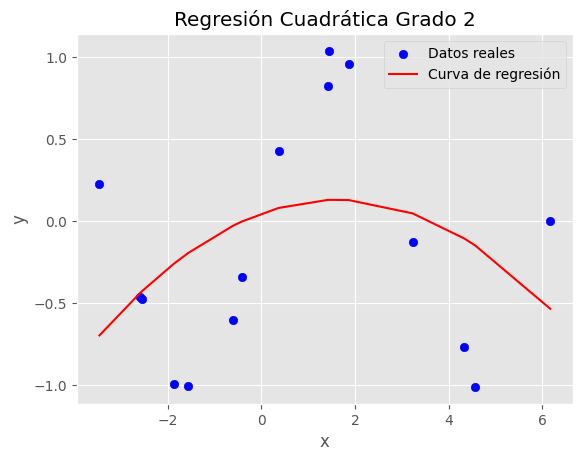

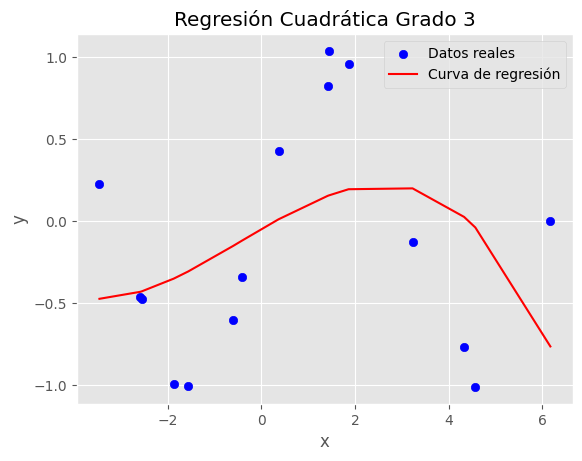

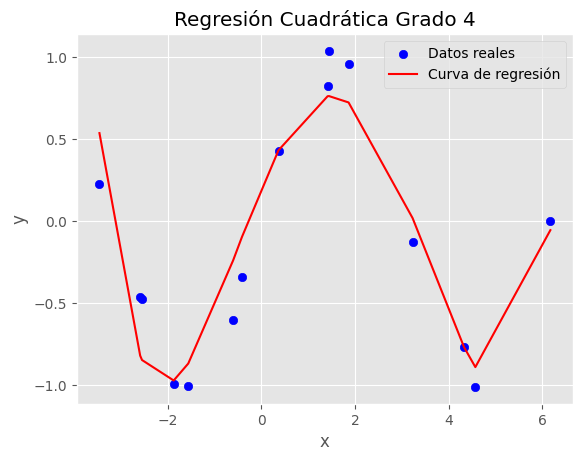

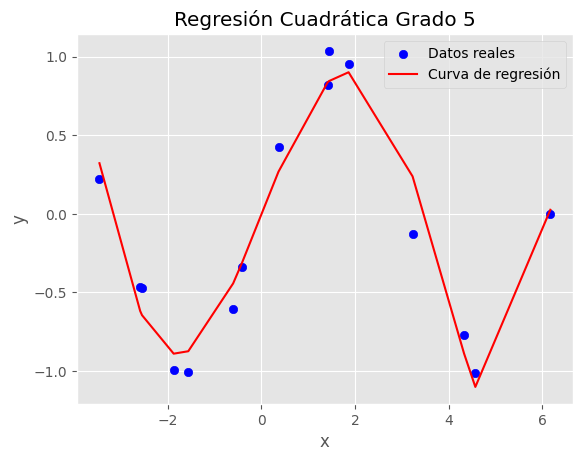

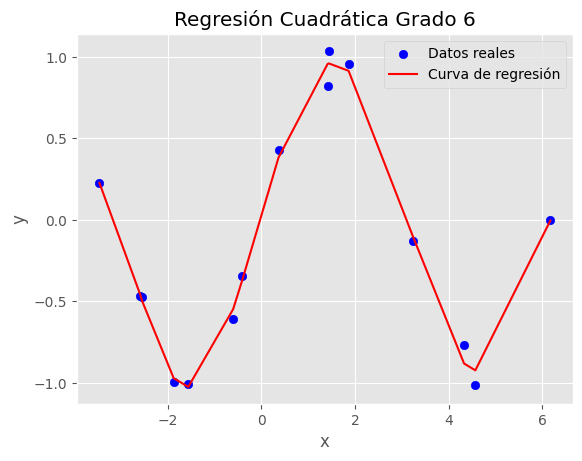

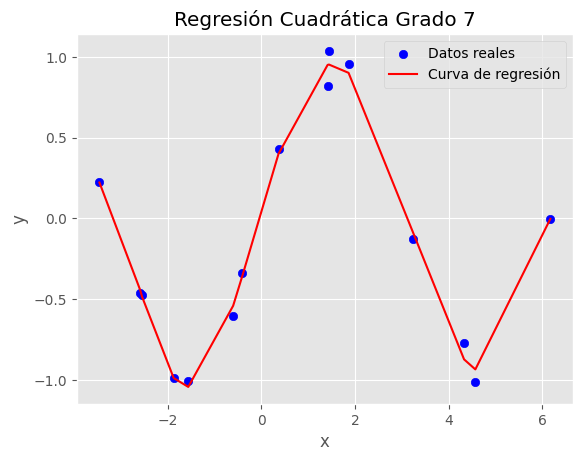

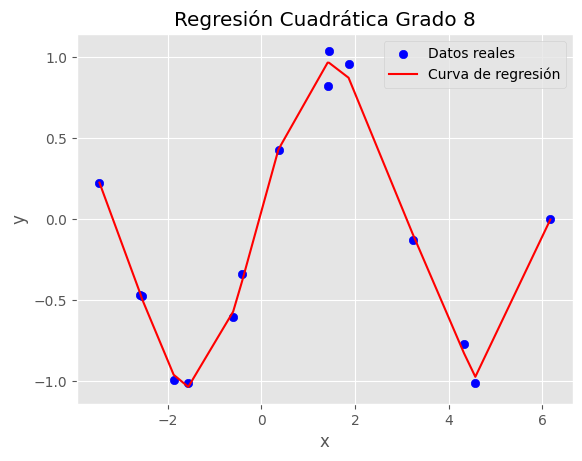

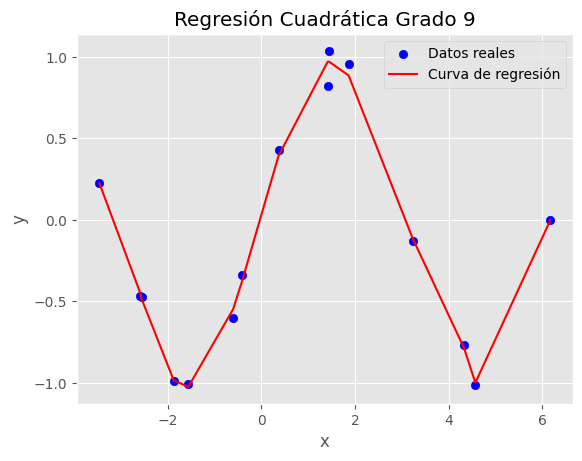

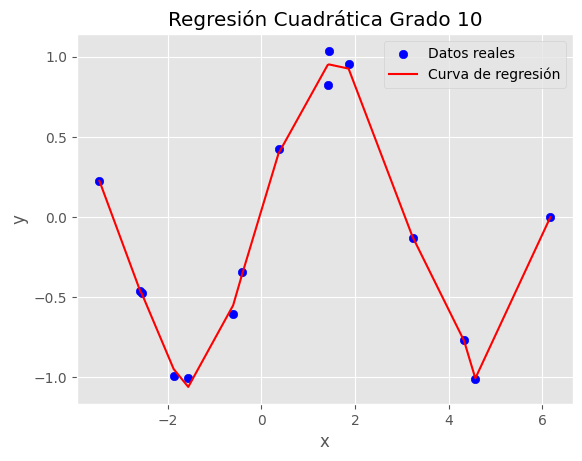

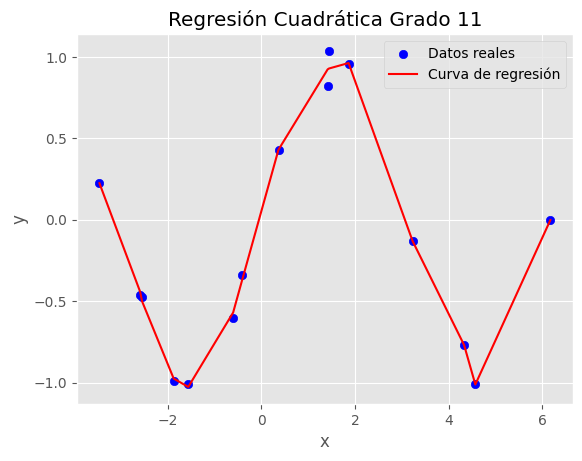

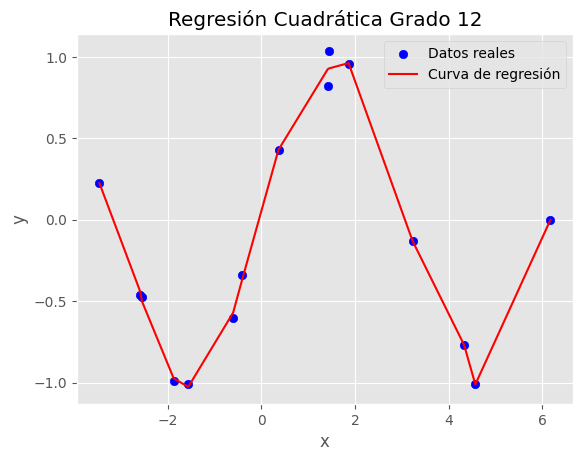

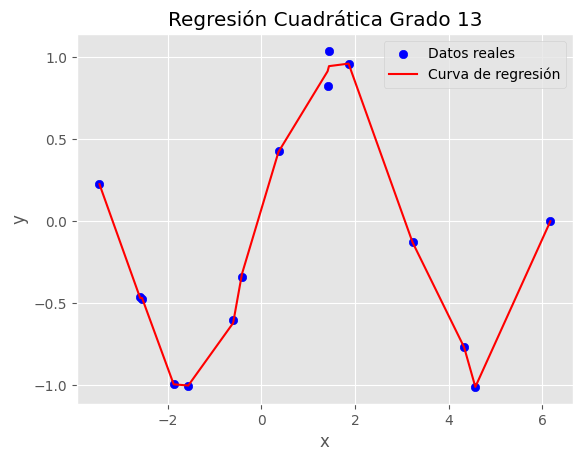

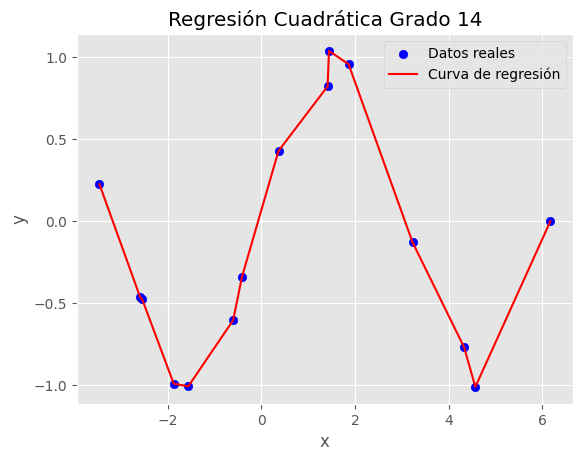

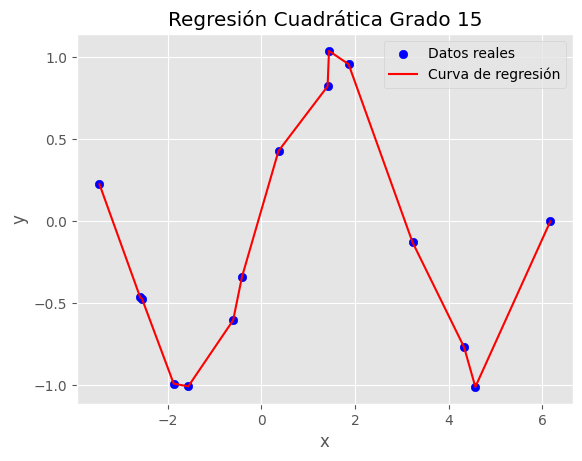

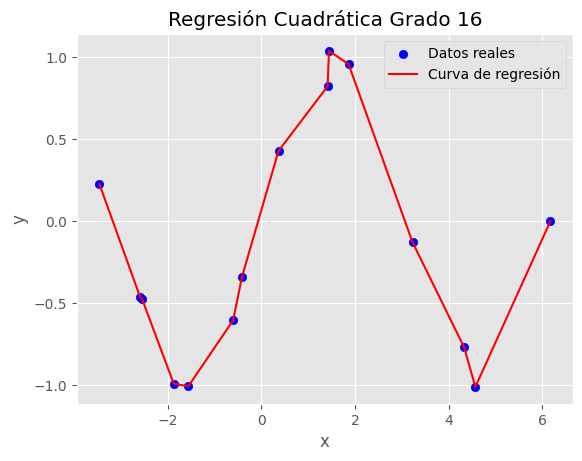

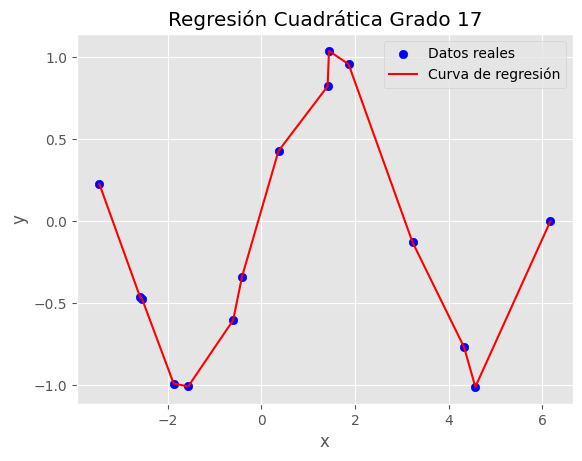

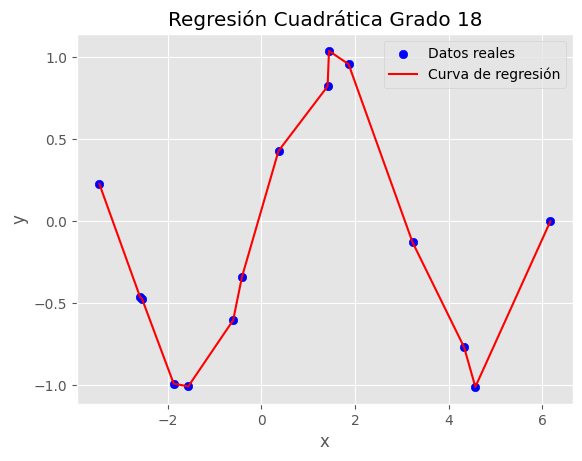

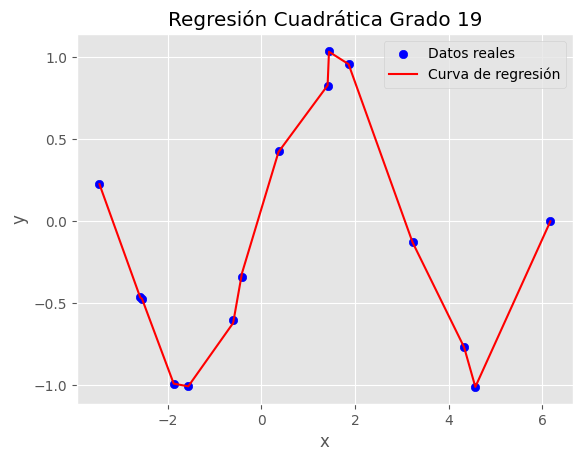

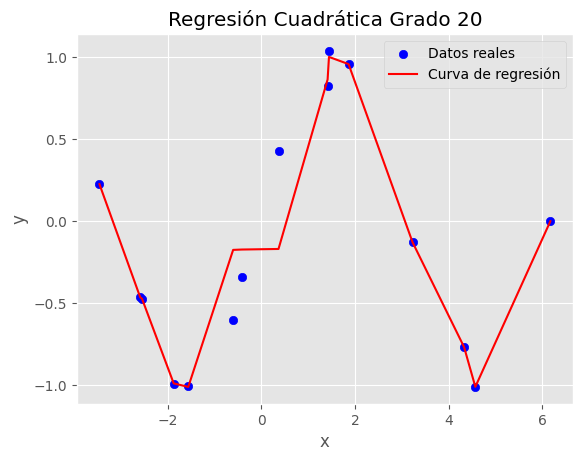

[[0.29078170732663505, 0.42958255391077915],
 [0.2970009193267581, 0.4099813860668455],
 [0.03781821275300233, 0.043588090299140965],
 [0.020299404736931682, 0.016940310723151105],
 [0.0027166093129768762, 0.002738410047991364],
 [0.004966471125089548, 0.0034475331459862977],
 [0.0071211853012351, 0.0036671538997195374],
 [0.016110361246643286, 0.004036331673838929],
 [0.016809613260374175, 0.004435653032063306],
 [0.05880963344519961, 0.004890901289776197],
 [0.08620617217655913, 0.004891877453262002],
 [5.1141012771173715, 0.005453773008186671],
 [971.9870485696541, 0.006637365406719214],
 [5491.208717154604, 0.006637689675995171],
 [29909.03801318886, 0.00663767996656651],
 [236925.4418950459, 0.006637581990692396],
 [1306084.4929093448, 0.006637265640714946],
 [12994166.644400584, 0.006753731189217145],
 [6177532.533106269, 0.03728543323243049]]

In [ ]:
errores = []
error_np = []

for i in range(2,21):
  model = LinearRegression()
  poly = PolynomialFeatures(degree=i)
  x_poly = poly.fit_transform(x.reshape(-1, 1))

  model.fit(x_poly, y)
  y_pred = model.predict(x_poly)

  plt.scatter(x, y, color='blue', label='Datos reales')
  plt.plot(x, y_pred, color='red', label='Curva de regresión')
  plt.title('Regresión Cuadrática Grado {i}'.format(i=i))
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

  x_test_poly = poly.fit_transform(x_test.reshape(-1, 1))
  y_test = model.predict(x_test_poly)

  mse_test = np.mean((y_test - f(x_test))**2)
  mse_train = np.mean((y_pred - f(x))**2)
  errores.append([mse_test, mse_train])
  error_np.append(sklearn.metrics.mean_squared_error(y,y_pred))

errores

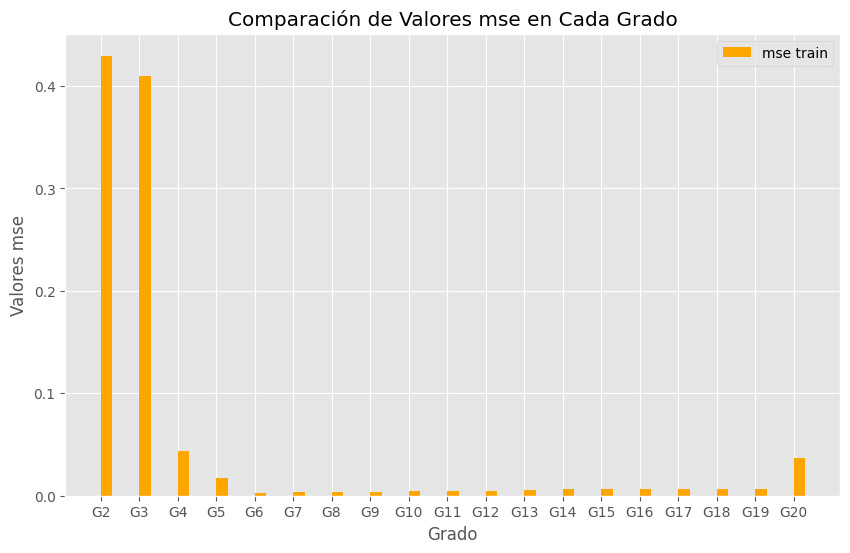

In [ ]:
msetest = [x[0] for x in errores]
msetrain = [x[1] for x in errores]

totalgrados = np.arange(len(errores))
plt.figure(figsize=(10, 6))
ancho = 0.3

plt.bar(totalgrados + ancho, msetrain, width=ancho, label='mse train', color='orange')

plt.xlabel('Grado')
plt.ylabel('Valores mse')
plt.title('Comparación de Valores mse en Cada Grado')
plt.xticks(totalgrados + ancho / 2, [f'G{i+2}' for i in range(len(errores))])
plt.legend()
plt.show()

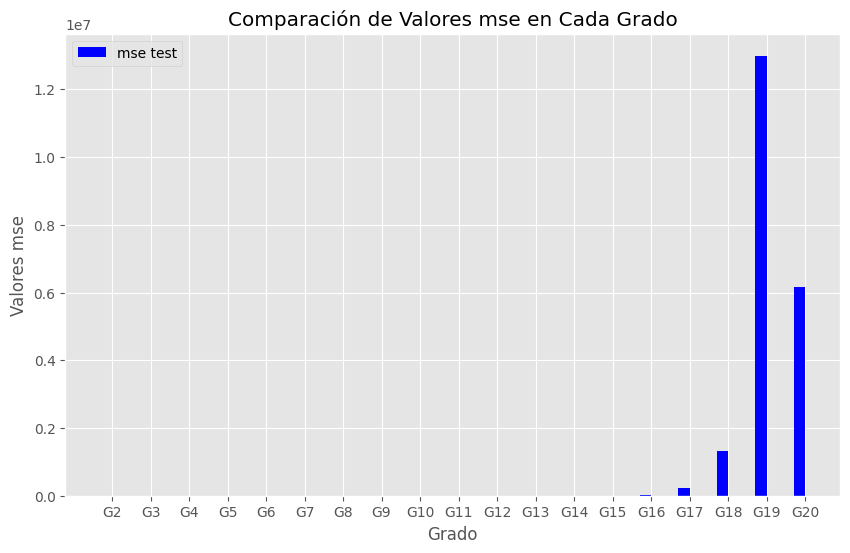

In [ ]:
totalgrados = np.arange(len(errores))
plt.figure(figsize=(10, 6))
ancho = 0.3

plt.bar(totalgrados, msetest, width=ancho, label='mse test', color='blue')

plt.xlabel('Grado')
plt.ylabel('Valores mse')
plt.title('Comparación de Valores mse en Cada Grado')
plt.xticks(totalgrados + ancho / 2, [f'G{i+2}' for i in range(len(errores))])
plt.legend()
plt.show()

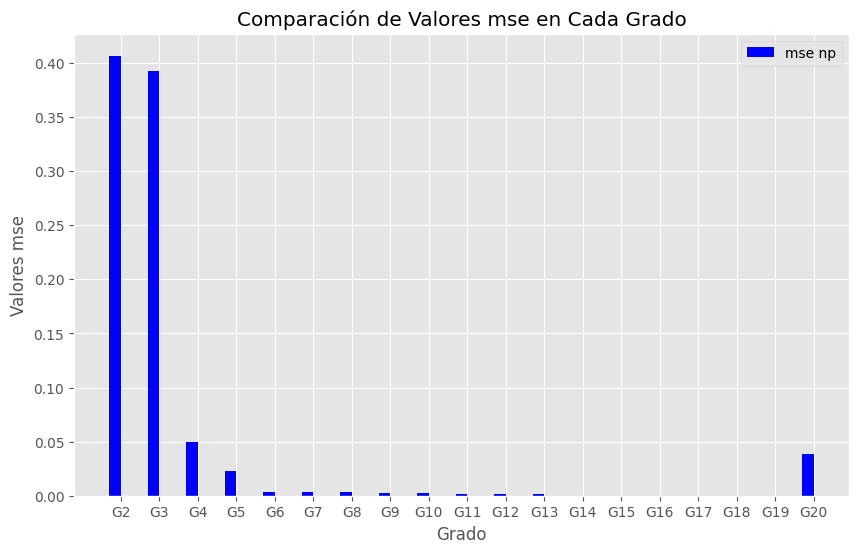

In [ ]:
totalgrados = np.arange(len(errores))
plt.figure(figsize=(10, 6))
ancho = 0.3

plt.bar(totalgrados, error_np, width=ancho, label='mse np', color='blue')

plt.xlabel('Grado')
plt.ylabel('Valores mse')
plt.title('Comparación de Valores mse en Cada Grado')
plt.xticks(totalgrados + ancho / 2, [f'G{i+2}' for i in range(len(errores))])
plt.legend()
plt.show()

# **Ejercicio 2**

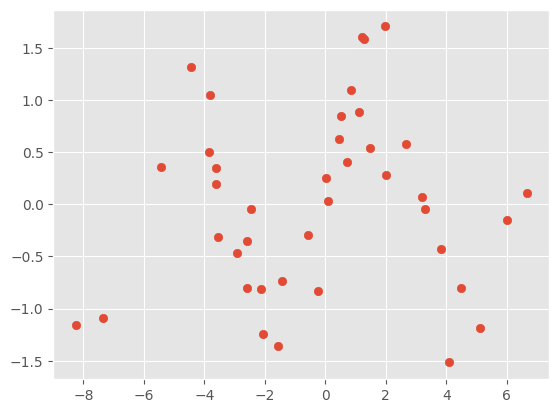

Lista total despues de calcular
[1.9514428283316987, 1.9237714267084052, 1.8917094886376684, 1.427023066612258, 1.2581156564934006, 1.0625638742922816, 1.0460961125594483, 1.0270728036846044, 1.0278536123357758, 1.0309157351886102, 1.0311758296047309, 1.0353857409801295, 1.0358595266299475, 1.047720234501067, 1.0449689588046251, 1.0745278521905113, 1.414165188221702, 1.615938664573913, 1.756396243558342]


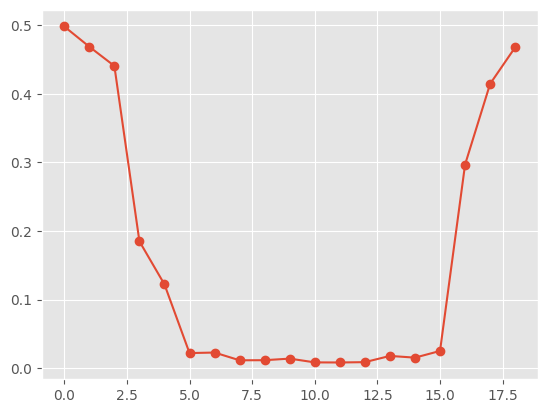

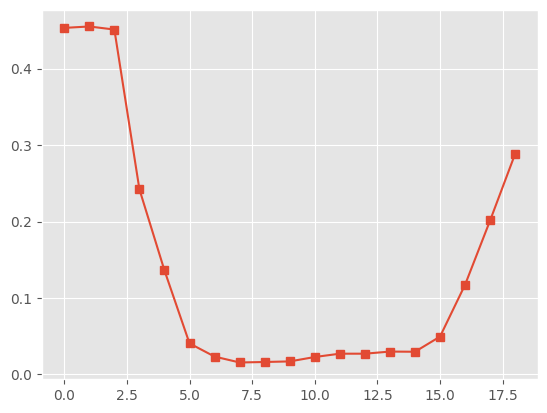

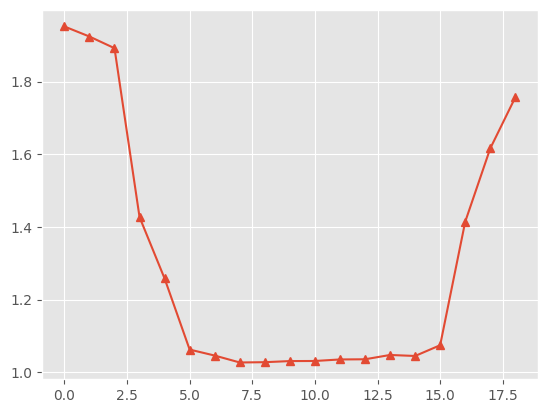

[0.49812187813598935, 0.46860923419614103, 0.44056583048311504, 0.18484801956244548, 0.12207898906033589, 0.021945630052774338, 0.022724835866606757, 0.011421291765988946, 0.011572796285173118, 0.013867828796141896, 0.008366923158202023, 0.008239071549287703, 0.008719227288200597, 0.017797552941905093, 0.015288341011004956, 0.025036650159624935, 0.296843769860158, 0.41448308529947325, 0.46775538700930547]
[0.4533209501957094, 0.4551621925122641, 0.4511436581545533, 0.24217504704981274, 0.1360366674330648, 0.04061824423950718, 0.02337127669284147, 0.015651511918615454, 0.016280816050602644, 0.017047906392468323, 0.022808906446528818, 0.02714666943084167, 0.027140299341746988, 0.029922681559161796, 0.0296806177936201, 0.0494912020308864, 0.11732141836154379, 0.20145557927443977, 0.2886408565490365]
Lista total despues de plot
[1.9514428283316987, 1.9237714267084052, 1.8917094886376684, 1.427023066612258, 1.2581156564934006, 1.0625638742922816, 1.0460961125594483, 1.0270728036846044, 1.02

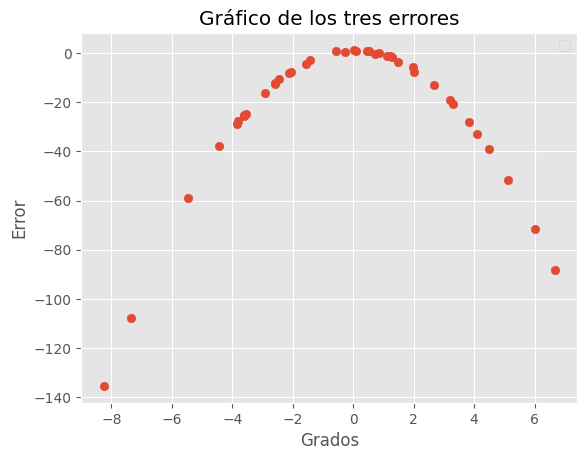

Lista total despues de calcular
[1.0099613680362305, 1.0146561974341664, 1.0148439227281896, 1.0170458216278984, 1.0181334775457889, 1.0198012778145058, 1.0257964787719605, 1.0261620341310376, 1.0269341562701146, 1.030760210004373, 1.0311308030197373, 1.0353863989041816, 1.0359201069145971, 1.0476676290432916, 1.0458191187679837, 1.0646862982757703, 2.3771470247183237, 9.573110885861606, 16.335280187229817]


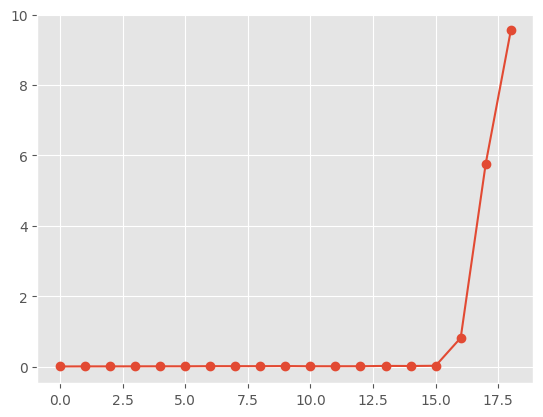

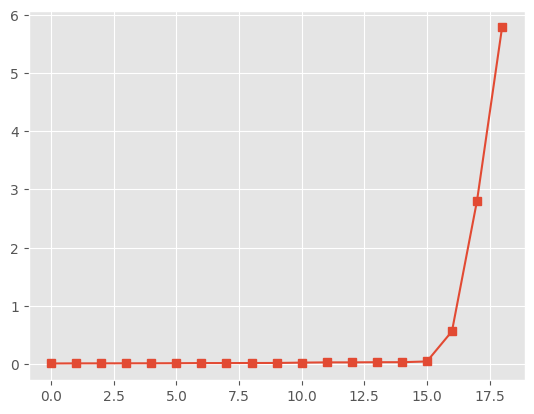

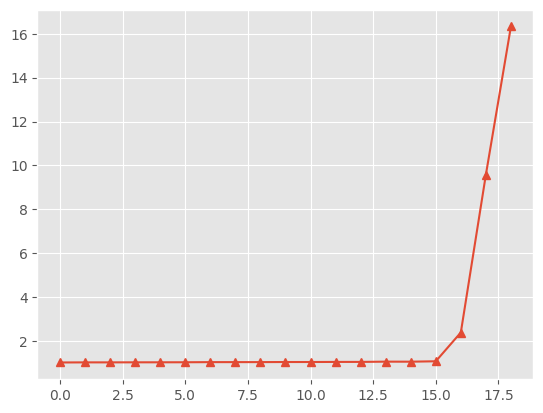

[0.0017525867416245487, 0.004492372003933722, 0.004451241598988797, 0.00581595521934579, 0.006682104829633939, 0.006964417333353305, 0.010581179799762188, 0.010881012399399896, 0.010737025422326003, 0.013713416014196761, 0.008322662432137692, 0.008239093924741337, 0.008730211320078072, 0.017790775644459862, 0.015624867704280442, 0.0218149929248881, 0.8156414250832041, 5.768299070359721, 9.549182152141302]
[0.008208781294606046, 0.010163825430232651, 0.010392681129200835, 0.011229866408552513, 0.011451372716154882, 0.01283686048115254, 0.015215298972198288, 0.015281021731637617, 0.01619713084778864, 0.017046793990176057, 0.02280814058759959, 0.02714730497944019, 0.027189895594519, 0.029876853398831626, 0.030194251063703232, 0.04287130535088224, 0.5615055996351195, 2.8048118155018846, 5.786098035088514]
Lista total despues de plot
[1.0099613680362305, 1.0146561974341664, 1.0148439227281896, 1.0170458216278984, 1.0181334775457889, 1.0198012778145058, 1.0257964787719605, 1.0261620341310376

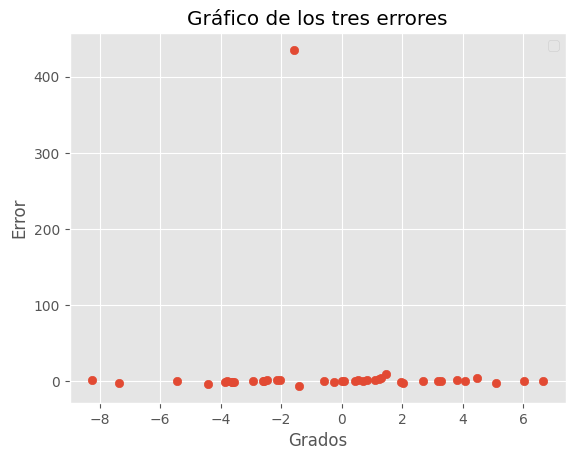

Lista total despues de calcular
[4848.802767796624, 4819.144958510407, 4926.375876134676, 4954.46960259501, 5177.797554903071, 5204.788668174523, 5427.732186560437, 5611.3011746380835, 5650.945140672958, 6442.452266794176, 6365.132476458339, 7198.087158917571, 7920.414167064256, 7702.146765867903, 8763.093362964606, 8635.046295747736, 5208.572885984768, 4932.006949774251, 4978.022448320938]


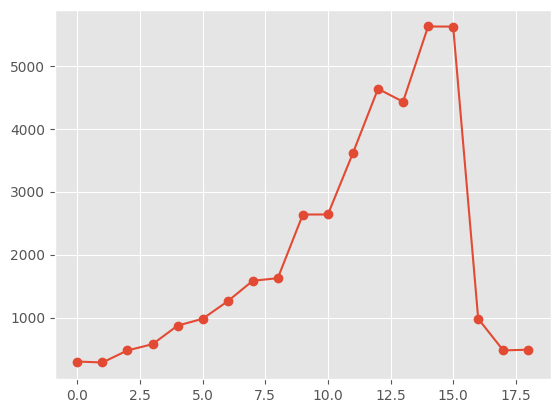

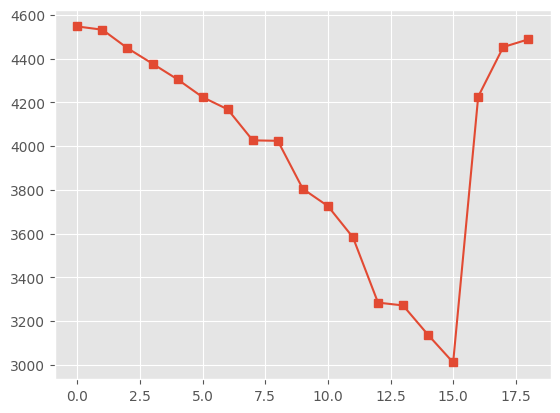

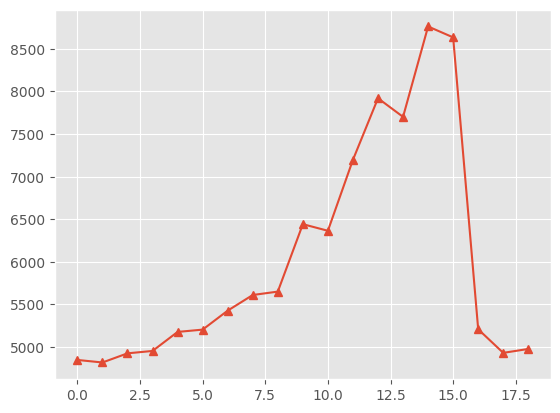

[301.0700396876579, 286.22689421289346, 477.81043967426785, 576.7858557736666, 871.866263096645, 980.0636025770747, 1258.6608025732266, 1583.9411403480983, 1625.5452238352507, 2636.7413048221674, 2637.9608140735836, 3613.7547283267613, 4634.280356062823, 4428.975527670863, 5624.418433842692, 5622.441846722403, 981.3269949081174, 478.21280339338506, 489.164195332564]
[4546.732728108966, 4531.918064297514, 4447.565436460409, 4376.683746821343, 4304.931291806426, 4223.7250655974485, 4168.0713839872105, 4026.3600342899854, 4024.399916837707, 3804.710961972008, 3726.1716623847547, 3583.33243059081, 3285.133811001433, 3272.1712381970406, 3137.674929121913, 3011.6044490253335, 4226.24589107665, 4452.794146380866, 4487.858252988373]
Lista total despues de plot
[4848.802767796624, 4819.144958510407, 4926.375876134676, 4954.46960259501, 5177.797554903071, 5204.788668174523, 5427.732186560437, 5611.3011746380835, 5650.945140672958, 6442.452266794176, 6365.132476458339, 7198.087158917571, 7920.414

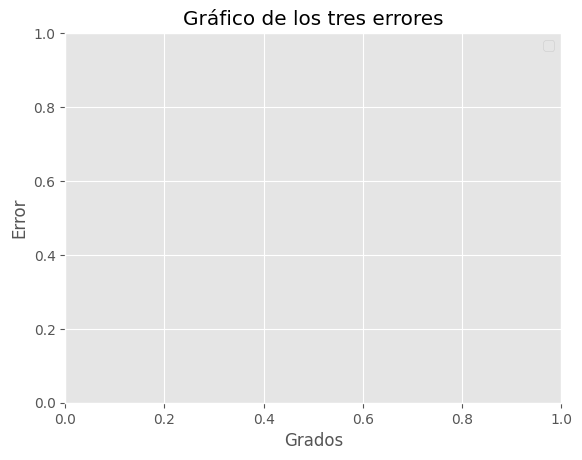

In [ ]:
funciones = [lambda x: np.sin(x),lambda X : 2 * -X**2 +1,lambda x: np.tan(x)]
m = 40

def graficadora(funciones, m):
  x = np.sort(np.random.normal(loc=0, scale = 3, size=m))
  x_test = np.sort(np.random.normal(loc=0, scale = 3, size=int(m*0.3)))
  e = np.random.normal(loc=0, scale = 0.3, size=m)
  for f in funciones:
    y = f(x) + e
    plt.scatter(x,y)
    plt.show()

    errores = []
    error_total = []

    for i in range(2,21):
      poly = PolynomialFeatures(degree=i)
      model = LinearRegression()
      x_poly = poly.fit_transform(x.reshape(-1, 1))

      model.fit(x_poly, y)
      y_pred = model.predict(x_poly)

      #plt.scatter(x, y, color='blue', label='Datos reales')
      #plt.plot(x, y_pred, color='red', label='Curva de regresión')
      #plt.title('Regresión Cuadrática Grado {i}'.format(i=i))
      #plt.xlabel("x")
      #plt.ylabel("y")
      #plt.legend()
      #plt.show()

      x_test_poly = poly.fit_transform(x_test.reshape(-1, 1))
      y_test = model.predict(x_test_poly)

      mse_test = np.mean((y_test - f(x_test))**2)
      mse_train = np.mean((y_pred - f(x))**2)
      errores.append([mse_test, mse_train])

    msetest = [x[0] for x in errores]
    msetrain = [x[1] for x in errores]
    msetotal = [x[0] + x[1] + 1 for x in errores]

    print('Lista total despues de calcular')
    print(msetotal)

    etiquetas = ['msetest', 'msetrain', 'msetotal']

    # Crear un rango de valores para el eje x (puedes ajustar esto según tu necesidad)
    largo = range(len(msetest))  # Asumiendo que las tres listas tienen la misma longitud

    # Crear el gráfico
    plt.plot(largo, msetest, label=etiquetas[0], marker='o')
    plt.show()  # Línea para lista1
    plt.plot(largo, msetrain, label=etiquetas[1], marker='s')
    plt.show() # Línea para lista2
    plt.plot(largo, msetotal, label=etiquetas[2], marker='^')  # Línea para lista3
    plt.show()
    # Añadir título y etiquetas a los ejes
    plt.title('Gráfico de los tres errores')
    plt.xlabel('Grados')
    plt.ylabel('Error')

    plt.legend()

    # Mostrar el gráfico


    print(msetest)
    print(msetrain)
    print('Lista total despues de plot')
    print(msetotal)

graficadora(funciones,m)

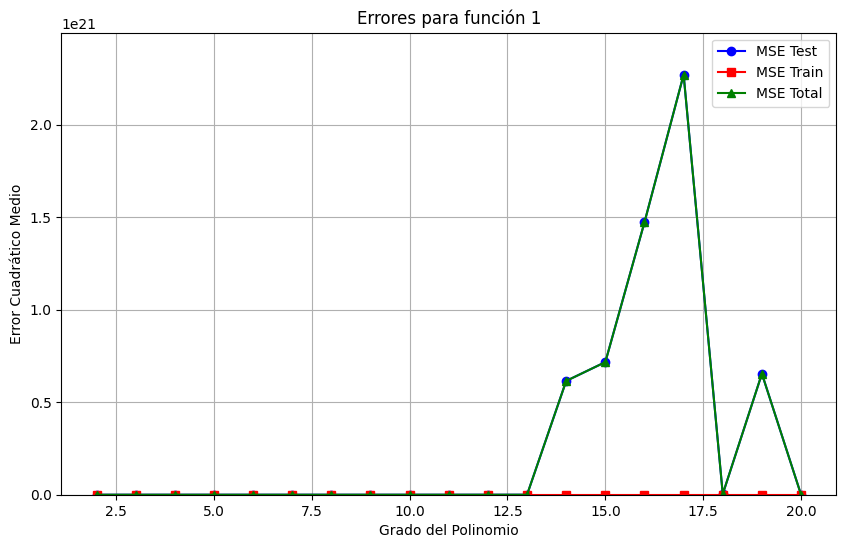

Errores para función 1:
MSE Test: [10.425119447812044, 2.009615777760358, 83.16298865092928, 358.9712606020762, 15127.83818101696, 47470.76371521981, 20143259.410965916, 40760857.35180451, 21971266.875620052, 2217853653.9175916, 81059734604842.03, 1534156174975209.2, 6.150686415053326e+20, 7.168427044043854e+20, 1.4726466974215286e+21, 2.2701219721826995e+21, 3.521345510131676e+18, 6.541297428141416e+20, 2.7653015100178896e+17]
MSE Train: [0.8978085913276553, 0.8770560062926545, 0.8049440225354002, 0.7359565766542029, 0.6776043482009624, 0.6497743422094033, 0.08936270114799758, 0.07253231732904616, 0.07223650309232185, 0.07060920810558612, 0.05228979287969944, 0.0369651478138741, 0.0007711040848858222, 2.6939585244617424e-07, 4.062031123621736e-09, 6.749536283247049e-08, 0.034876755026983265, 0.024261633341958504, 0.035088642932658926]
MSE Total: [12.322928039139699, 3.8866717840530125, 84.96793267346467, 360.7072171787304, 15129.51578536516, 47472.413489562015, 20143260.500328615, 407

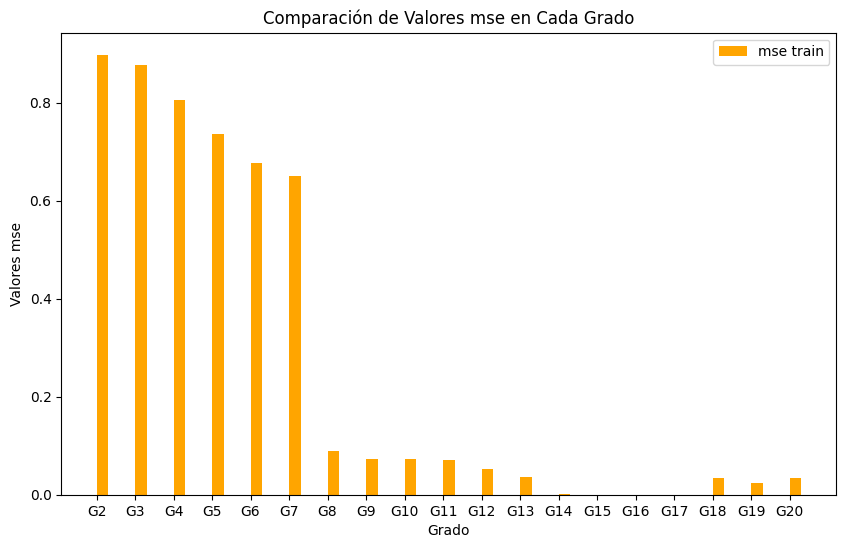

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Definición de funciones
funciones = [lambda x: np.sin(x), lambda x: 2.5 * x**2 + 100, lambda x: np.tan(x)]
m = 15

def graficadora(funciones, m):
    x = np.sort(np.random.normal(loc=0, scale=3, size=m))
    x_test = np.sort(np.random.normal(loc=0, scale=3, size=int(m*0.3)))
    e = np.random.normal(loc=0, scale=1, size=m)

    for f in funciones:
        y = f(x) + e

        # Inicializar listas de errores
        errores = []
        for i in range(2, 21):
            model = LinearRegression()
            poly = PolynomialFeatures(degree=i)
            x_poly = poly.fit_transform(x.reshape(-1, 1))

            model.fit(x_poly, y)
            y_pred = model.predict(x_poly)

            # Evaluar en el conjunto de prueba
            x_test_poly = poly.transform(x_test.reshape(-1, 1))
            y_test = f(x_test) + np.random.normal(loc=0, scale=1, size=len(x_test))  # Generar ruido
            y_test_pred = model.predict(x_test_poly)

            mse_test = np.mean((y_test_pred - y_test)**2)
            mse_train = np.mean((y_pred - y)**2)
            errores.append([mse_test, mse_train])

        msetest = [x[0] for x in errores]
        msetrain = [x[1] for x in errores]
        msetotal = [(x[0] + x[1] + 1) for x in errores]  # Sumar los errores de test y entrenamiento

        # Crear un rango de valores para el eje x (grados del polinomio)
        grados = range(2, 21)

        # Crear el gráfico
        plt.figure(figsize=(10, 6))
        plt.plot(grados, msetest, label='MSE Test', marker='o', color='blue')
        plt.plot(grados, msetrain, label='MSE Train', marker='s', color='red')
        plt.plot(grados, msetotal, label='MSE Total', marker='^', color='green')

        # Añadir título y etiquetas a los ejes
        plt.title(f'Errores para función {funciones.index(f) + 1}')
        plt.xlabel('Grado del Polinomio')
        plt.ylabel('Error Cuadrático Medio')

        # Ajustar los límites del eje y para asegurar que los valores se vean correctamente
        plt.ylim([0, max(max(msetest), max(msetrain), max(msetotal)) * 1.1])

        # Añadir una leyenda para identificar cada línea
        plt.legend()

        # Mostrar el gráfico
        plt.grid(True)
        plt.show()

        # Imprimir los errores para depuración
        print(f"Errores para función {funciones.index(f) + 1}:")
        print("MSE Test:", msetest)
        print("MSE Train:", msetrain)
        print("MSE Total:", msetotal)

        totalgrados = np.arange(len(errores))
        plt.figure(figsize=(10, 6))
        ancho = 0.3

        plt.bar(totalgrados + ancho, msetrain, width=ancho, label='mse train', color='orange')

        plt.xlabel('Grado')
        plt.ylabel('Valores mse')
        plt.title('Comparación de Valores mse en Cada Grado')
        plt.xticks(totalgrados + ancho / 2, [f'G{i+2}' for i in range(len(errores))])
        plt.legend()
        plt.show()

        totalgrados = np.arange(len(errores))
        plt.figure(figsize=(10, 6))
        ancho = 0.3

        plt.bar(totalgrados + ancho, msetest, width=ancho, label='mse train', color='orange')

        plt.xlabel('Grado')
        plt.ylabel('Valores mse')
        plt.title('Comparación de Valores mse en Cada Grado')
        plt.xticks(totalgrados + ancho / 2, [f'G{i+2}' for i in range(len(errores))])
        plt.legend()
        plt.show()

        totalgrados = np.arange(len(errores))
        plt.figure(figsize=(10, 6))
        ancho = 0.3

        plt.bar(totalgrados + ancho, msetest, width=ancho, label='mse train', color='orange')

        plt.xlabel('Grado')
        plt.ylabel('Valores mse')
        plt.title('Comparación de Valores mse en Cada Grado')
        plt.xticks(totalgrados + ancho / 2, [f'G{i+2}' for i in range(len(errores))])
        plt.legend()
        plt.show()



graficadora(funciones, m)
